# Linear Regression

## Importing Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [4]:
df = pd.DataFrame(pd.read_excel("Exam.xlsx"))

In [5]:
df

,Unnamed: 0,SNo.,English,Physics,Chemisrty,Maths,Bio/Csc,Total,Cutoff,Chance,Unnamed: 10,Unnamed: 11,Unnamed: 12,140
0,NaN,1,79,99,81,79,98,436,169.0,0.483333,NaN,140.5,NaN,NaN
1,NaN,2,78,84,72,83,99,416,161.0,0.350000,NaN,NaN,NaN,NaN
2,NaN,3,94,70,77,97,92,430,170.5,0.508333,NaN,NaN,NaN,NaN
3,NaN,4,96,78,95,85,70,424,171.5,0.525000,NaN,NaN,NaN,NaN
4,NaN,5,99,99,94,74,95,461,170.5,0.508333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,996,90,100,74,99,90,453,186.0,0.766667,NaN,NaN,NaN,NaN
996,NaN,997,97,80,91,95,71,434,180.5,0.675000,NaN,NaN,NaN,NaN
997,NaN,998,95,93,77,85,93,443,170.0,0.500000,NaN,NaN,NaN,NaN
998,NaN,999,76,77,80,88,95,416,166.5,0.441667,NaN,NaN,NaN,NaN


# Understanding And Slicing Of Dataset

In [7]:
df = df.drop(['Unnamed: 0', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 11', 140], axis = 1)

In [8]:
df

,SNo.,English,Physics,Chemisrty,Maths,Bio/Csc,Total,Cutoff,Chance,Unnamed: 12
0,1,79,99,81,79,98,436,169.0,0.483333,NaN
1,2,78,84,72,83,99,416,161.0,0.350000,NaN
2,3,94,70,77,97,92,430,170.5,0.508333,NaN
3,4,96,78,95,85,70,424,171.5,0.525000,NaN
4,5,99,99,94,74,95,461,170.5,0.508333,NaN
...,...,...,...,...,...,...,...,...,...,...
995,996,90,100,74,99,90,453,186.0,0.766667,NaN
996,997,97,80,91,95,71,434,180.5,0.675000,NaN
997,998,95,93,77,85,93,443,170.0,0.500000,NaN
998,999,76,77,80,88,95,416,166.5,0.441667,NaN


In [9]:
df = df.drop(['Unnamed: 12'], axis = 1)

In [10]:
df

,SNo.,English,Physics,Chemisrty,Maths,Bio/Csc,Total,Cutoff,Chance
0,1,79,99,81,79,98,436,169.0,0.483333
1,2,78,84,72,83,99,416,161.0,0.350000
2,3,94,70,77,97,92,430,170.5,0.508333
3,4,96,78,95,85,70,424,171.5,0.525000
4,5,99,99,94,74,95,461,170.5,0.508333
...,...,...,...,...,...,...,...,...,...
995,996,90,100,74,99,90,453,186.0,0.766667
996,997,97,80,91,95,71,434,180.5,0.675000
997,998,95,93,77,85,93,443,170.0,0.500000
998,999,76,77,80,88,95,416,166.5,0.441667


In [11]:
df.head()

,SNo.,English,Physics,Chemisrty,Maths,Bio/Csc,Total,Cutoff,Chance
0,1,79,99,81,79,98,436,169.0,0.483333
1,2,78,84,72,83,99,416,161.0,0.350000
2,3,94,70,77,97,92,430,170.5,0.508333
3,4,96,78,95,85,70,424,171.5,0.525000
4,5,99,99,94,74,95,461,170.5,0.508333


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo.       1000 non-null   int64  
 1   English    1000 non-null   int64  
 2   Physics    1000 non-null   int64  
 3   Chemisrty  1000 non-null   int64  
 4   Maths      1000 non-null   int64  
 5   Bio/Csc    1000 non-null   int64  
 6   Total      1000 non-null   int64  
 7   Cutoff     1000 non-null   float64
 8   Chance     1000 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


In [14]:
df = df.drop(['SNo.', 'English', 'Physics', 'Chemisrty', 'Bio/Csc', 'Total', 'Cutoff'], axis = 1)

In [15]:
df

,Maths,Chance
0,79,0.483333
1,83,0.350000
2,97,0.508333
3,85,0.525000
4,74,0.508333
...,...,...
995,99,0.766667
996,95,0.675000
997,85,0.500000
998,88,0.441667


# Reshaping The Dataset 

In [16]:
x = df.iloc[:,0]

In [17]:
x.shape

(1000,)

In [19]:
x = df.iloc[:,0].values.reshape(-1,1)

In [20]:
x.shape

(1000, 1)

In [21]:
x

array([[ 79],
       [ 83],
       [ 97],
       [ 85],
       [ 74],
       [ 91],
       [ 94],
       [ 91],
       [ 74],
       [ 95],
       [ 85],
       [ 99],
       [ 70],
       [ 73],
       [ 98],
       [ 91],
       [ 84],
       [ 85],
       [ 74],
       [ 96],
       [ 98],
       [ 74],
       [ 73],
       [ 98],
       [ 75],
       [ 73],
       [ 93],
       [ 96],
       [ 74],
       [ 87],
       [ 80],
       [ 82],
       [ 82],
       [ 97],
       [ 77],
       [ 87],
       [ 75],
       [ 94],
       [ 84],
       [ 89],
       [ 99],
       [ 81],
       [ 74],
       [ 76],
       [ 95],
       [ 82],
       [ 97],
       [ 70],
       [ 98],
       [ 92],
       [ 85],
       [ 96],
       [ 91],
       [ 97],
       [ 80],
       [ 99],
       [ 71],
       [ 95],
       [ 78],
       [ 70],
       [ 78],
       [ 70],
       [ 74],
       [ 97],
       [ 95],
       [ 85],
       [ 75],
       [ 94],
       [ 73],
       [ 90],
       [ 94],
      

In [22]:
y = df.iloc[:,-1].values.reshape(-1,1)

In [23]:
y.shape

(1000, 1)

In [24]:
y

array([[0.48333333],
       [0.35      ],
       [0.50833333],
       [0.525     ],
       [0.50833333],
       [0.53333333],
       [0.88333333],
       [0.60833333],
       [0.20833333],
       [0.74166667],
       [0.54166667],
       [0.86666667],
       [0.1       ],
       [0.275     ],
       [0.70833333],
       [0.61666667],
       [0.65      ],
       [0.48333333],
       [0.25833333],
       [0.51666667],
       [0.65      ],
       [0.30833333],
       [0.30833333],
       [0.79166667],
       [0.44166667],
       [0.34166667],
       [0.81666667],
       [0.61666667],
       [0.13333333],
       [0.43333333],
       [0.41666667],
       [0.4       ],
       [0.23333333],
       [0.675     ],
       [0.325     ],
       [0.35833333],
       [0.25      ],
       [0.71666667],
       [0.375     ],
       [0.65      ],
       [0.63333333],
       [0.40833333],
       [0.125     ],
       [0.54166667],
       [0.7       ],
       [0.56666667],
       [0.60833333],
       [0.341

# Scatter Plot 

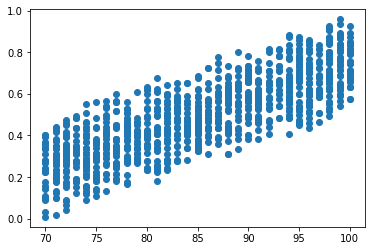

In [25]:
plt.scatter(x,y)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [28]:
x_train.shape

(700, 1)

In [29]:
x_test.shape

(300, 1)

In [30]:
y_train.shape

(700, 1)

In [31]:
y_test.shape

(300, 1)

# Performing The Linear Regression 

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(x_train,y_train)

LinearRegression()

# Predictinng The Chance With Respect to Maths  

In [36]:
y_pred = lm.predict(x_test)

In [38]:
check = pd.DataFrame(x_test,columns =['Maths'])

In [39]:
check

,Maths
0,97
1,88
2,98
3,92
4,98
...,...
295,94
296,88
297,71
298,81


In [40]:
check['Chance Actual'] = y_test

In [41]:
check

,Maths,Chance Actual
0,97,0.508333
1,88,0.425000
2,98,0.691667
3,92,0.550000
4,98,0.516667
...,...,...
295,94,0.575000
296,88,0.441667
297,71,0.216667
298,81,0.525000


In [42]:
check['Chance Predicted'] = y_pred

In [43]:
check

,Maths,Chance Actual,Chance Predicted
0,97,0.508333,0.695981
1,88,0.425000,0.542918
2,98,0.691667,0.712988
3,92,0.550000,0.610946
4,98,0.516667,0.712988
...,...,...,...
295,94,0.575000,0.644960
296,88,0.441667,0.542918
297,71,0.216667,0.253798
298,81,0.525000,0.423869


# visualizing The Regression Line

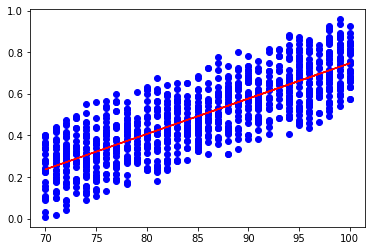

In [44]:
plt.scatter(x,y, color = 'blue')
plt.plot(x_test,y_pred,color = 'red')

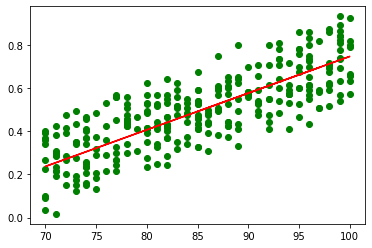

In [45]:
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_test,y_pred,color = 'red')